In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# 1. Load the Iris Dataset
# Fetch the dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
# 2. Check for Missing Values
# Ensure there are no missing values in the dataset
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [4]:
# check duplicates in dataset

df.duplicated().sum()

1

In [5]:
dr = df[df.duplicated()]
dr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
142,5.8,2.7,5.1,1.9,2


In [6]:
# check datatype of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
# 3. Data Visualization and Summary Statistics
# Display basic statistics to understand the data distribution
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


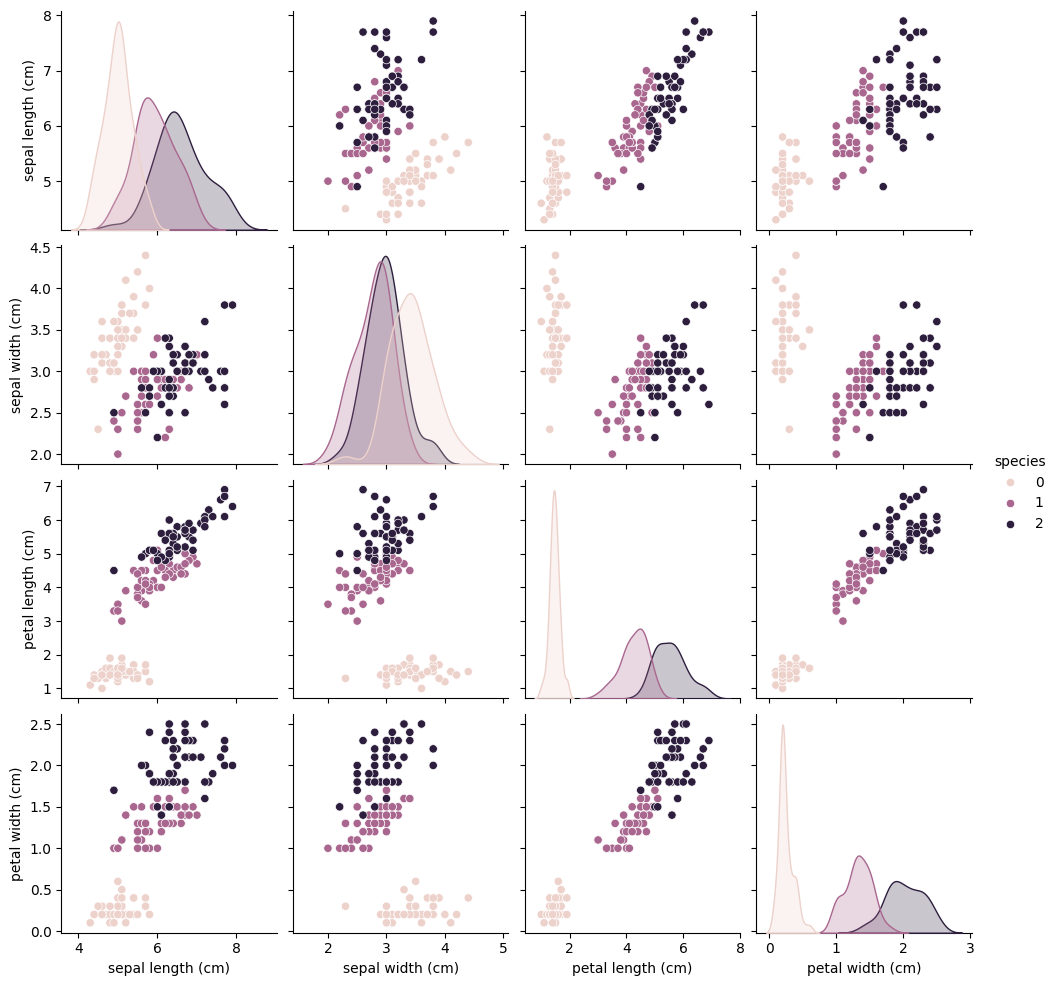

In [8]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='species', diag_kind='kde')
plt.show()

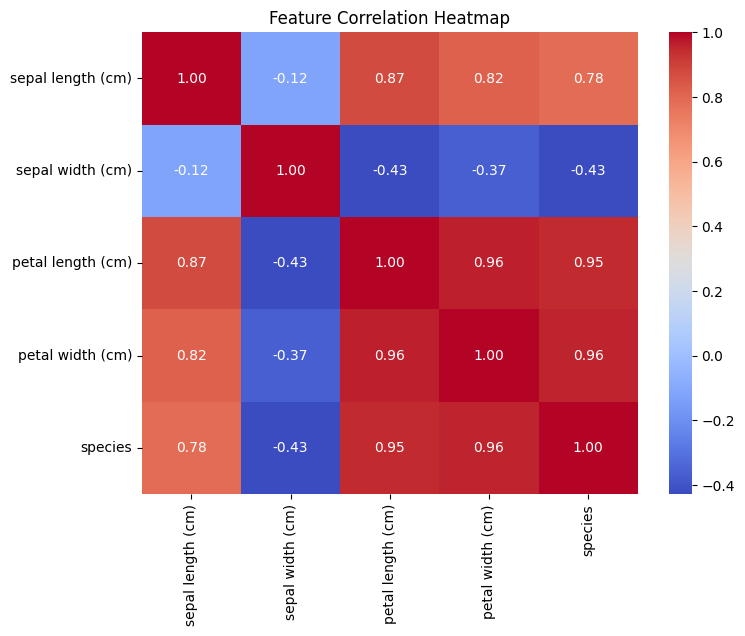

In [9]:
# Correlation heatmap to see how features relate to each other
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [10]:
# seperate input variable and a target variable
X=df.drop('species',axis=1)
y=df['species']

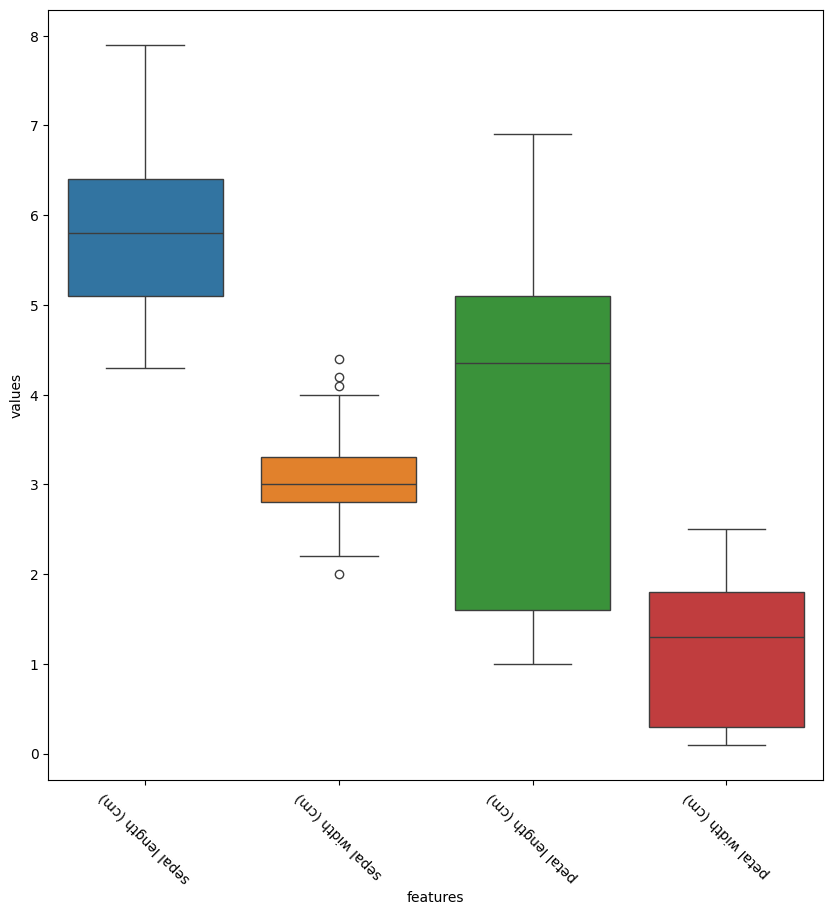

In [11]:
# tocheck weather all input variables have outliers or not
# boxplot
plt.figure(figsize=(10,10))
sns.boxplot(data=X, orient='v')
plt.xticks(rotation=135)
plt.xlabel('features')
plt.ylabel('values')
plt.show()

In [ ]:
# standard scaling all the colums to reduce the effect of outliers

In [12]:
# 4. Standardize the Features# 5. Split the Data into Training and Testing Sets: # 80% training, 20% testing
# Normalize the dataset to improve model performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()

# scale the train_data and test_data

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

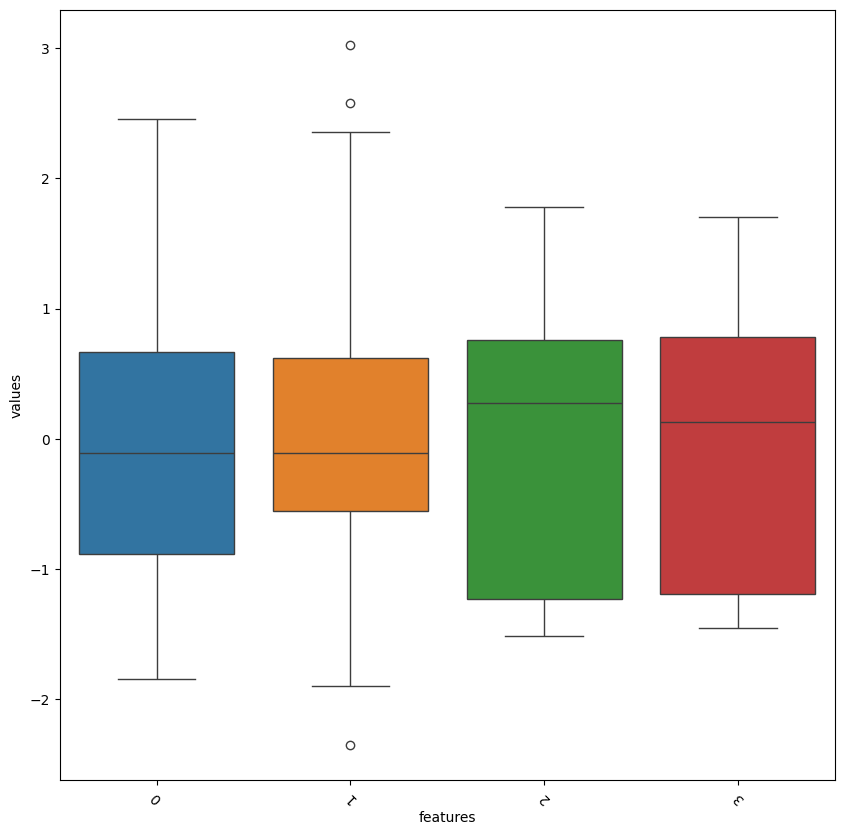

In [13]:
# tocheck weather all input variables have outliers or not
# boxplot
plt.figure(figsize=(10,10))
sns.boxplot(data=X_train_scaled, orient='v')
plt.xticks(rotation=135)
plt.xlabel('features')
plt.ylabel('values')
plt.show()

In [14]:
# check weather the dataset is balanced or not
df['species'].value_counts(normalize=True)

,proportion
species,
0,0.333333
1,0.333333
2,0.333333


In [15]:
# 6. Train the Logistic Regression Model
# step 1 is build the basic model
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay \
, precision_score, recall_score, f1_score


In [16]:
# intialize the model
lr_basic=LogisticRegression()

# train the model
lr_basic.fit(X_train_scaled,y_train)

# prrect the model
y_pred_basic=lr_basic.predict(X_test_scaled)

acc_score_basic 0.9333333333333333

confusion_matrix_basic 
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]



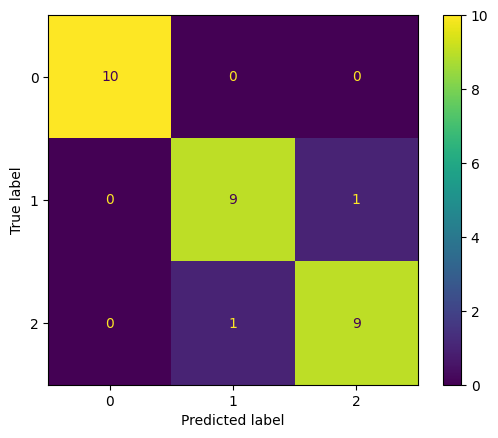

In [17]:
print('acc_score_basic',accuracy_score(y_test,y_pred_basic))
print()
print('confusion_matrix_basic \n',confusion_matrix(y_test,y_pred_basic))
print()
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_basic)).plot()
plt.show()

In [29]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_basic)
print(f'Accuracy: {accuracy:.2f}')

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred_basic, average='weighted')
recall = recall_score(y_test, y_pred_basic, average='weighted')
f1 = f1_score(y_test, y_pred_basic, average='weighted')

print(f'Precision Score (Weighted): {precision:.2f}')
print(f'Recall Score (Weighted): {recall:.2f}')
print(f'F1 Score (Weighted): {f1:.2f}')


Accuracy: 0.93
Precision Score (Weighted): 0.93
Recall Score (Weighted): 0.93
F1 Score (Weighted): 0.93


In [30]:
X_train_scaled.shape, y_train.shape
#(120, 4) means that after splitting the dataset, you have 120 samples, and each sample has 4 features (columns) in the dataset (sepal length, sepal width, petal length, petal width)
#(120,)

((120, 4), (120,))

In [31]:
np.unique(y_train, return_counts=True)
#It shows that the training dataset is balanced, meaning each class has the same number of samples (40)

(array([0, 1, 2]), array([40, 40, 40]))

In [21]:
# step 2 let's make this dataset balance
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)

X_train_smote, y_train_smote= smote.fit_resample(X_train_scaled,y_train)

X_train_smote.shape, y_train_smote.shape

((120, 4), (120,))

In [33]:
# balance Dataset
# intialize the model
lr_smote=LogisticRegression()

# train the model
lr_smote.fit(X_train_smote,y_train_smote)

# prrect the model
y_pred_smote=lr_smote.predict(X_test_scaled)

In [34]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_basic)
print(f'Accuracy: {accuracy:.2f}')

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred_basic, average='weighted')
recall = recall_score(y_test, y_pred_basic, average='weighted')
f1 = f1_score(y_test, y_pred_basic, average='weighted')

print(f'Precision Score (Weighted): {precision:.2f}')
print(f'Recall Score (Weighted): {recall:.2f}')
print(f'F1 Score (Weighted): {f1:.2f}')


Accuracy: 0.93
Precision Score (Weighted): 0.93
Recall Score (Weighted): 0.93
F1 Score (Weighted): 0.93


In [35]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid with valid combinations
parameters = {
    'penalty': [None, 'l1', 'l2'],  # 'elasticnet' needs solver='saga'
    'C': [0.001, 0.01, 0.1, 0.2, 1, 10, 100, 1000],
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'saga'],  # Ensure solver matches penalty
    'max_iter': [100, 200, 300]
}

# Initialize GridSearch with logistic regression and cross-validation
grid = GridSearchCV(LogisticRegression(), param_grid=parameters, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit on training data
grid.fit(X_train, y_train)

# Print best parameters
print("Best parameters:", grid.best_params_)


Best parameters: {'C': 0.001, 'max_iter': 100, 'penalty': None, 'solver': 'saga'}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
360 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_so

In [36]:
# Train model with best parameters
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate with metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_best, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_best, average='weighted'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [37]:
model_tuning=grid.best_estimator_

In [38]:
grid.best_params_

{'C': 0.001, 'max_iter': 100, 'penalty': None, 'solver': 'saga'}

In [39]:
grid.best_score_

0.9832679738562092

acc_score_basic 0.9333333333333333
Precision Score (Weighted): 0.93
Recall Score (Weighted): 0.93
F1 Score (Weighted): 0.93

confusion_matrix_basic 
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]



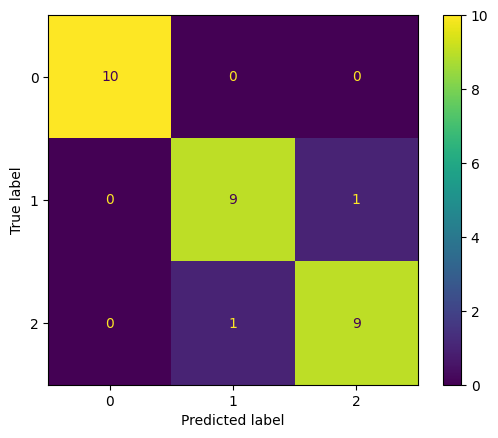

In [41]:
print('acc_score_basic',accuracy_score(y_test,y_pred_smote))
# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred_basic, average='weighted')
recall = recall_score(y_test, y_pred_basic, average='weighted')
f1 = f1_score(y_test, y_pred_basic, average='weighted')

print(f'Precision Score (Weighted): {precision:.2f}')
print(f'Recall Score (Weighted): {recall:.2f}')
print(f'F1 Score (Weighted): {f1:.2f}')
print()
print('confusion_matrix_basic \n',confusion_matrix(y_test,y_pred_smote))
print()
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_smote)).plot()
plt.show()

acc_score_rfc 0.9333333333333333
Precision Score (Weighted): 0.93
Recall Score (Weighted): 0.93
F1 Score (Weighted): 0.93

confusion_matrix_rfc 
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]



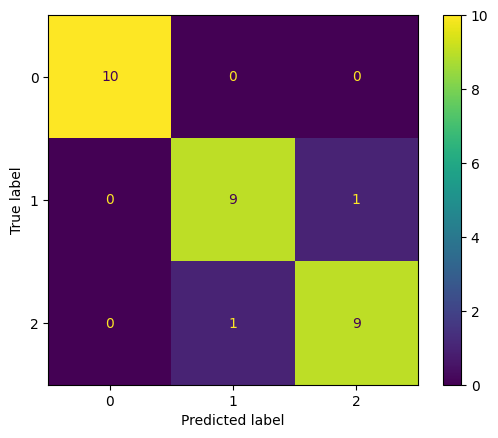

In [43]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier() # intializze the model
rfc.fit(X_train_smote,y_train_smote) # train the rfc model
y_pred_rfc=rfc.predict(X_test_scaled) # predictions through rfc


precision = precision_score(y_test, y_pred_basic, average='weighted')
recall = recall_score(y_test, y_pred_basic, average='weighted')
f1 = f1_score(y_test, y_pred_basic, average='weighted')

print('acc_score_rfc',accuracy_score(y_test,y_pred_rfc))
print(f'Precision Score (Weighted): {precision:.2f}')
print(f'Recall Score (Weighted): {recall:.2f}')
print(f'F1 Score (Weighted): {f1:.2f}')
print()
print('confusion_matrix_rfc \n',confusion_matrix(y_test,y_pred_rfc))
print()
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_rfc)).plot()
plt.show()

In [44]:
import pickle
pickle.dump(scaler,open('scaler_iris.pkl','wb'))

In [45]:
pickle.dump(lr_basic,open('model_lr_basic_iris.pkl','wb'))

In [46]:
pickle.dump(lr_smote,open('model_lr_smote_iris.pkl','wb'))

In [47]:
pickle.dump(model_tuning,open('model_tuning_smote_iris.pkl','wb'))

In [48]:
pickle.dump(rfc,open('model_rfc_smote_iris.pkl','wb'))